# Image Segmentation on CamVid dataset

In [1]:
!pip install fastai==2.0.10

     |████████████████████████████████| 358kB 8.6MB/s 
     |████████████████████████████████| 40kB 5.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

## Get data

In [3]:
path = untar_data(URLs.CAMVID)
path.ls()

(#4) [Path('/root/.fastai/data/camvid/codes.txt'),Path('/root/.fastai/data/camvid/images'),Path('/root/.fastai/data/camvid/labels'),Path('/root/.fastai/data/camvid/valid.txt')]

In [4]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [5]:
fnames = get_image_files(path/"images")
fnames[:3]

(#3) [Path('/root/.fastai/data/camvid/images/0016E5_08023.png'),Path('/root/.fastai/data/camvid/images/0001TP_006720.png'),Path('/root/.fastai/data/camvid/images/0006R0_f03240.png')]

In [6]:
lbl_names = get_image_files(path/"labels")
lbl_names[:3]

(#3) [Path('/root/.fastai/data/camvid/labels/0006R0_f03660_P.png'),Path('/root/.fastai/data/camvid/labels/Seq05VD_f04710_P.png'),Path('/root/.fastai/data/camvid/labels/0006R0_f01320_P.png')]

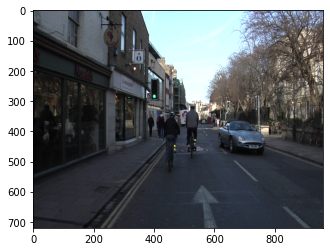

In [7]:
import PIL
import matplotlib.pyplot as plt

img_f = fnames[0]
img = PIL.Image.open(img_f)
plt.imshow(img)

In [8]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [9]:
label_func(img_f)

Path('/root/.fastai/data/camvid/labels/0016E5_08023_P.png')

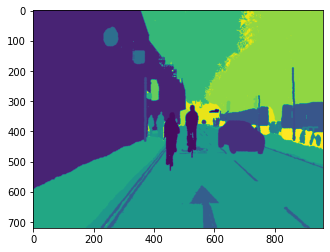

In [10]:
img = PIL.Image.open(label_func(img_f))
plt.imshow(img)

In [11]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=4, fnames = fnames, label_func = label_func, codes = codes
)

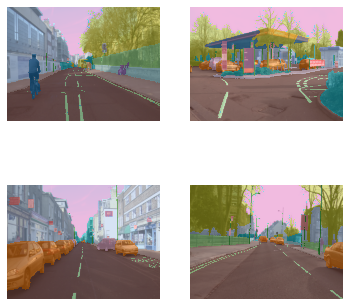

In [12]:
dls.show_batch()

## Training

In [13]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [14]:
learn = unet_learner(dls, resnet34, metrics=acc_camvid)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(10, lr_min)

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
learn.unfreeze()
lr_min, lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(10, lr_min)

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))